# Protein automatic classification using Gauss integral 
- Lucia Depaoli
- Alessandro Fella
- Simone Mistrali
- Lorenzo Mandolito
   
   


## Introduction


Classify structure of proteins is an important task in biology. In particoular the secondary structure of a protein is determined by the geometric distribution of the amino acid residues. There are $2$ main secondary structures:





# <center>Alpha Helix</center>

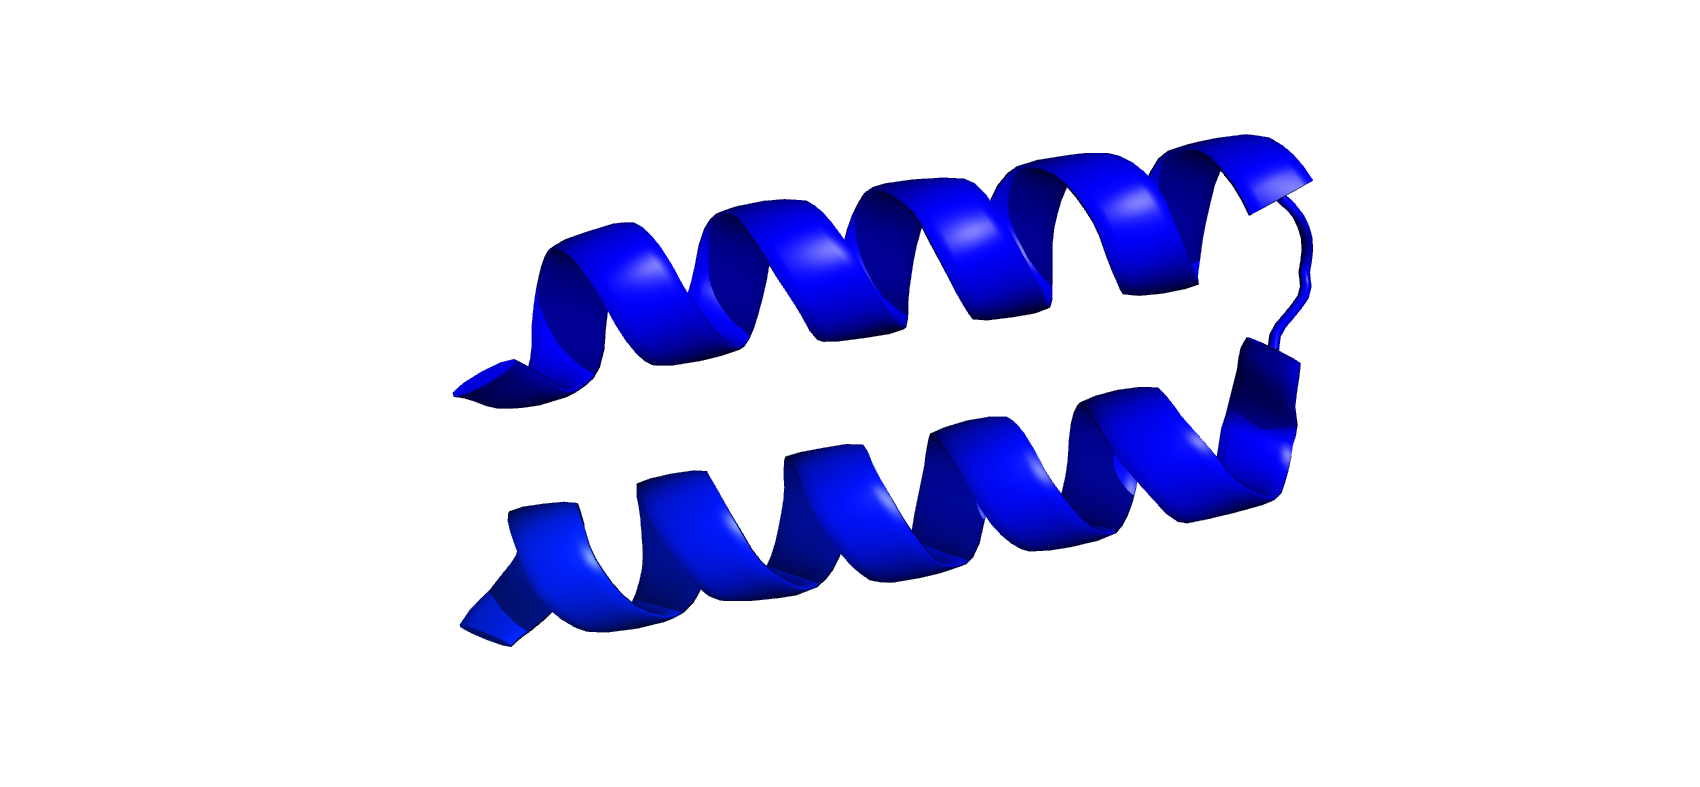

# <center>Beta Sheet</center>

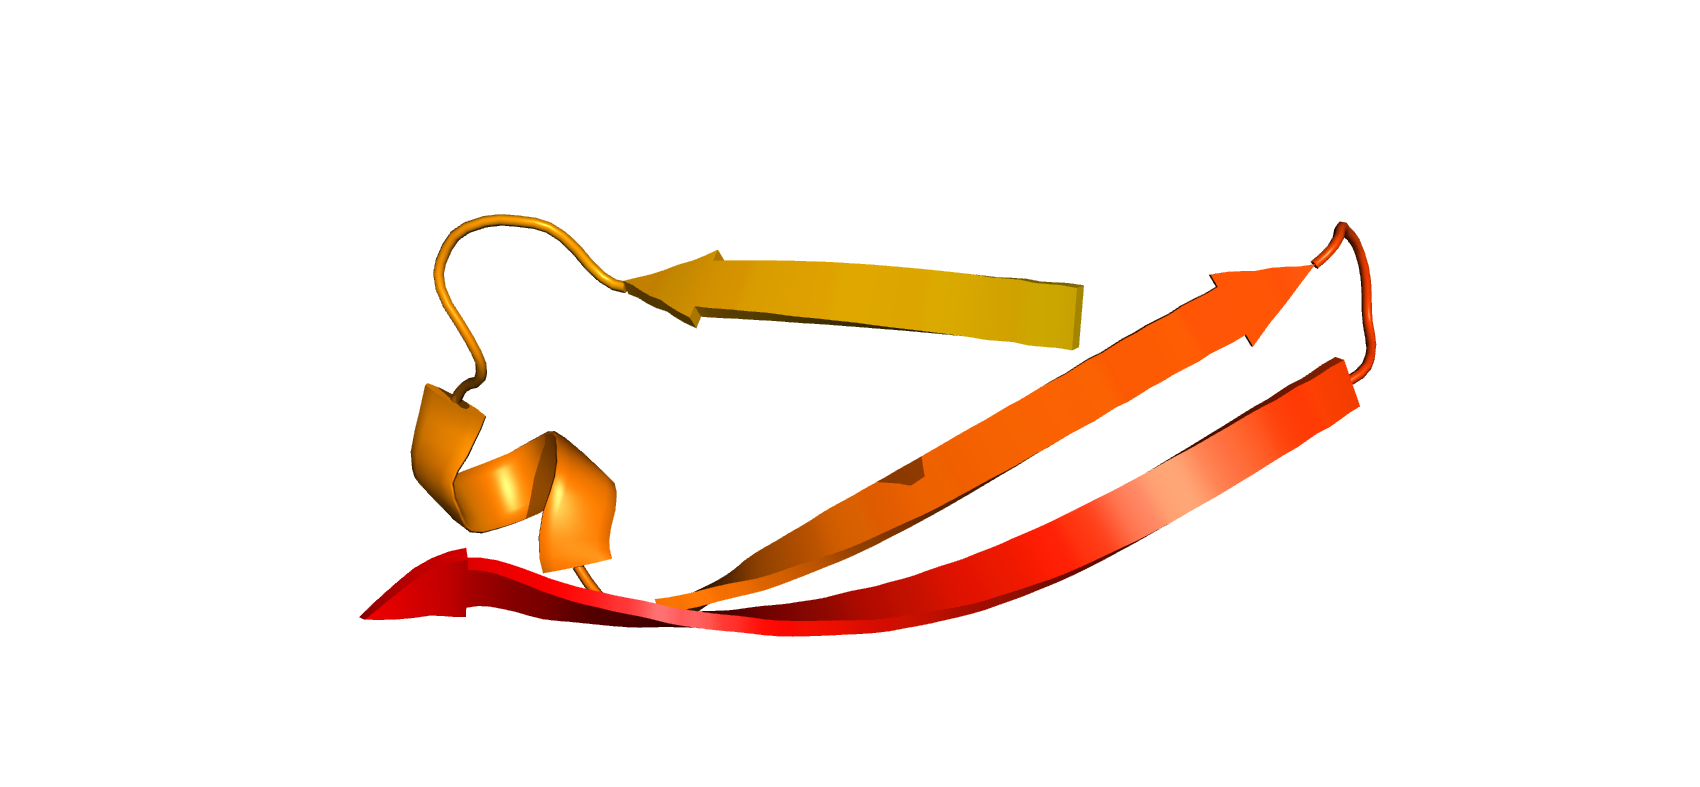

## PNAS Features

The chain of the carbon atoms $\{C_{\alpha}\}_{\alpha = 1 \dots N}$ (where $N$ is the length of the protein), is the backbone of the spatial structure of the protein.

In this work we try to classify the structure of **Inserise numero esatto** protein. We get the coordinations of the $C_{\alpha}$ from the [Protein Data Bank (PDB)](https://www.rcsb.org/) downloading the `.pdb` files and cleaning it to get the $C_\alpha$s.



For our project we have followed the main idea of this paper: "[Automatic classification of protein structure by using
Gauss integrals](https://doi.org/10.1073/pnas.2636460100)" by Peter Røgen and Boris Fain, from now on we will refer to it as *PNAS* for simplicity.

We map the protein's geometry into a topological curve and compute the Writhe $W_r$.

 The Writhe of a curve $\gamma$ may be calculated via Gauss integral in this way:  

$$
W_r(\gamma) = \frac{1}{4\pi}\int \int_{\gamma \times \gamma\ D} \omega(t_1,t_2)\,dt_1\,dt_2 
$$

where $\omega(t_1,t_2)=\frac{\left[\gamma'(t_1),\gamma(t_1)-\gamma(t_2),\gamma'(t_2)\right]}{\left|\gamma(t_1)-\gamma(t_2) \right|^3}$, $D$ is the diagonal of $\gamma\times\gamma$ and $\left[\gamma'(t_1),\gamma(t_1)-\gamma(t_2),\gamma'(t_2)\right]$ the triple scalar product. 

As $\omega(t_1,t_2)=\omega(t_2,t_1)$ we can use this simpler formula:


$$
W_r(\gamma) = \frac{1}{2\pi}\int \int_{0<t_1<t_2<L} \omega(t_1,t_2)\,dt_1\,dt_2 
$$

We have a polygonal so we can use a more simple definition:

$$
W_r(\mu) = \sum _{0<i_1<i_2<N}W(i_1,i_2)
$$

with

$$
    W(i_1,i_2)=\frac{1}{2\pi}\int_{i_1=t_1}^{i_1+1}\int_{i_2=t_2}^{i_2+1}\omega(t_1,t_2)\,dt_1\,dt_2
$$

where $W(i_1, i_2)$ is the contribution to writhe coming from the i 1th
and the i 2th line segments, which equals the probability from an
arbitrary direction to see the i1th and the i2th line segment cross,
multiplied by the sign of this crossing

## PNAS Features

Following the *PNAS* we have computed a family of $14$ structural measures, they are computed as follows:

$$
I_{(1,2)}(\mu)= \sum _{0<i_1<i_2<N}W\left(i_1,i_2\right)
$$

$$
I_{|1,2|(3,5)}(\mu)= \sum_{0<i_1<i_2<i_3<i_5<N}\left|W(i_1,i_2)\right|W\left(i_3,i_5\right)\\
$$

# New Features

We propose a new kind of features whose computation is faster than the PNAS' ones. The calculations is based on a matrix of "nearest neighbor interaction", we compute the $\omega(t_1,t_2)$ only for the NN segments and then the definitions of the $I$-s are the same.

In this case the features are only local so they do not give an optimal representation of the whole protein, but only a local one.

# CATH

We follow the classification convention of the [CATH](https://www.cathdb.info/) database, every protein is classified with a number for its **C**lass, its **A**rchitecture,its **T**opology and its **H**omogous superfamily. 

In the next few slides we will show the division by class:
1. Mainly $\alpha$.
2. Mainly $\beta$.
3. Both $\alpha$ and $\beta$.
4. Few secondary structure.
6. Special

<h1>Mainly $\alpha$ </h1>

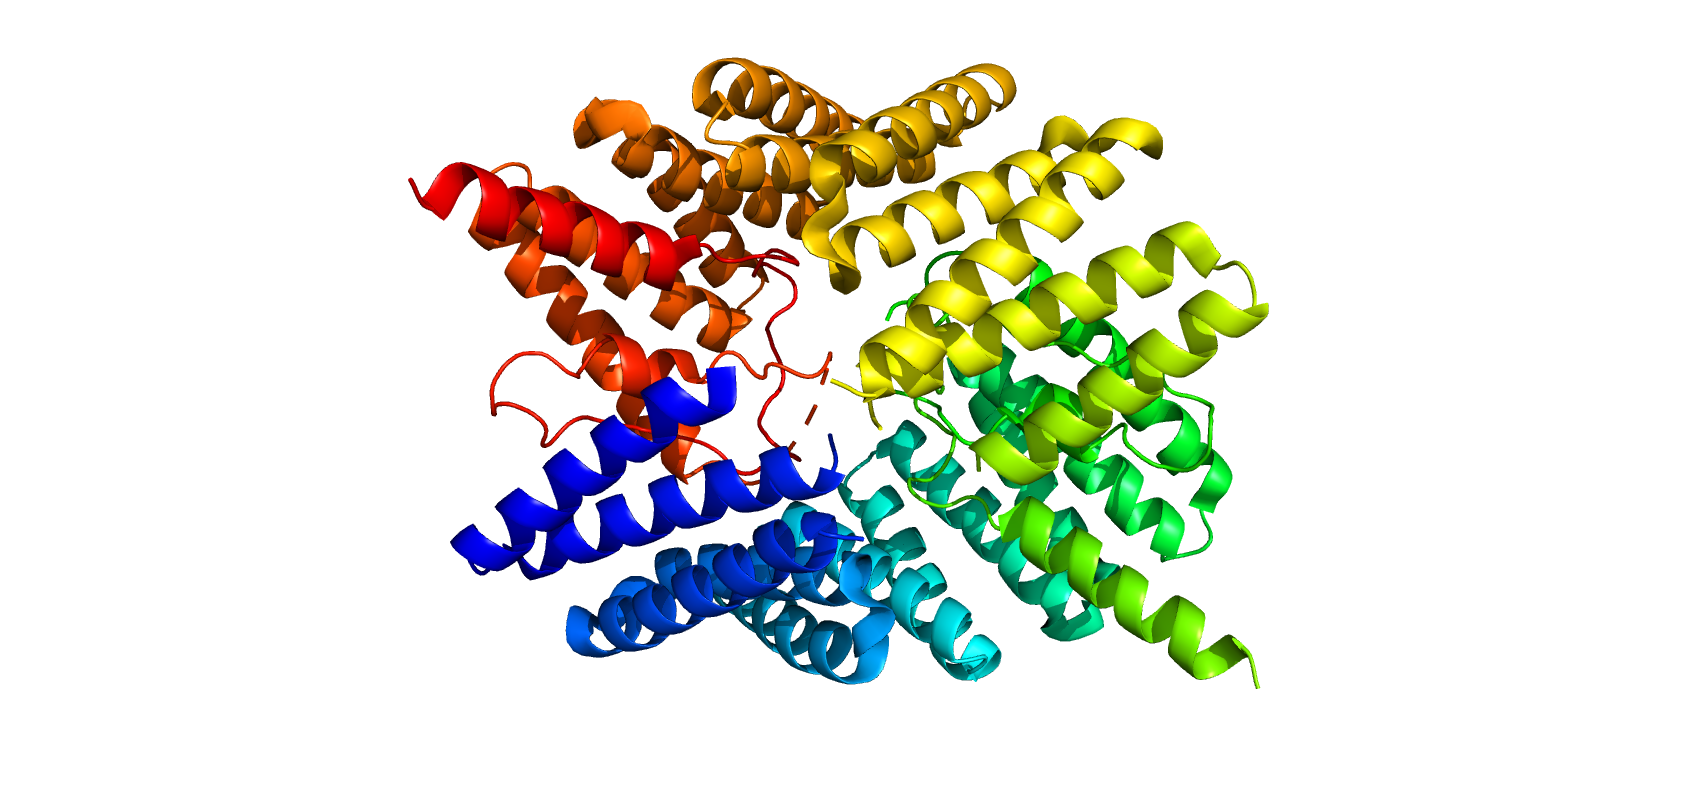

<h1>Mainly $\beta$ </h1>

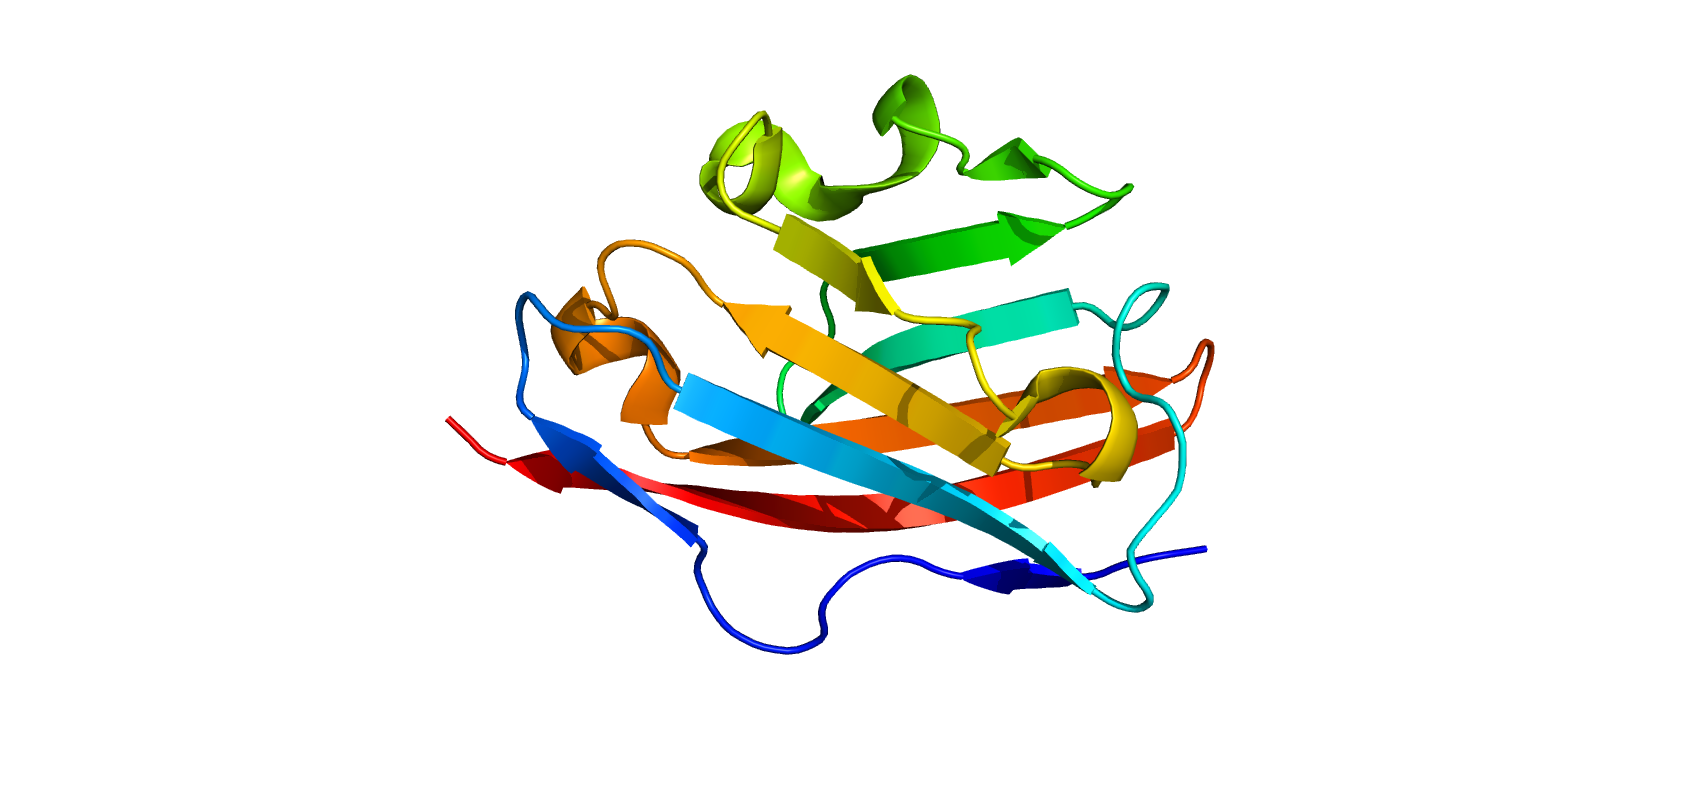

<h1>Both $\alpha$ and $\beta$</h1>

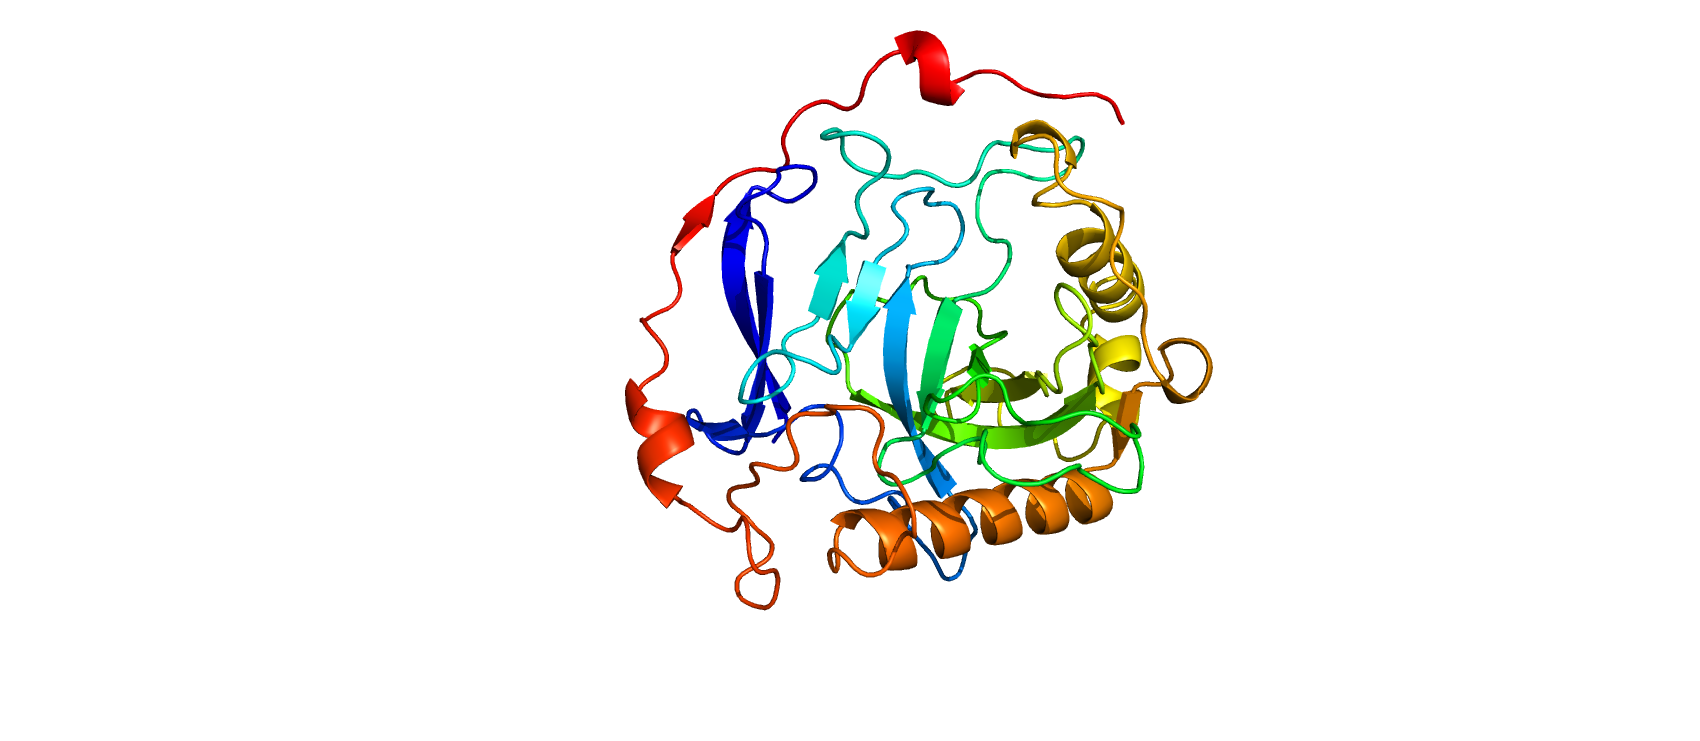

<h1><center>Few secondary structure. </center></h1>

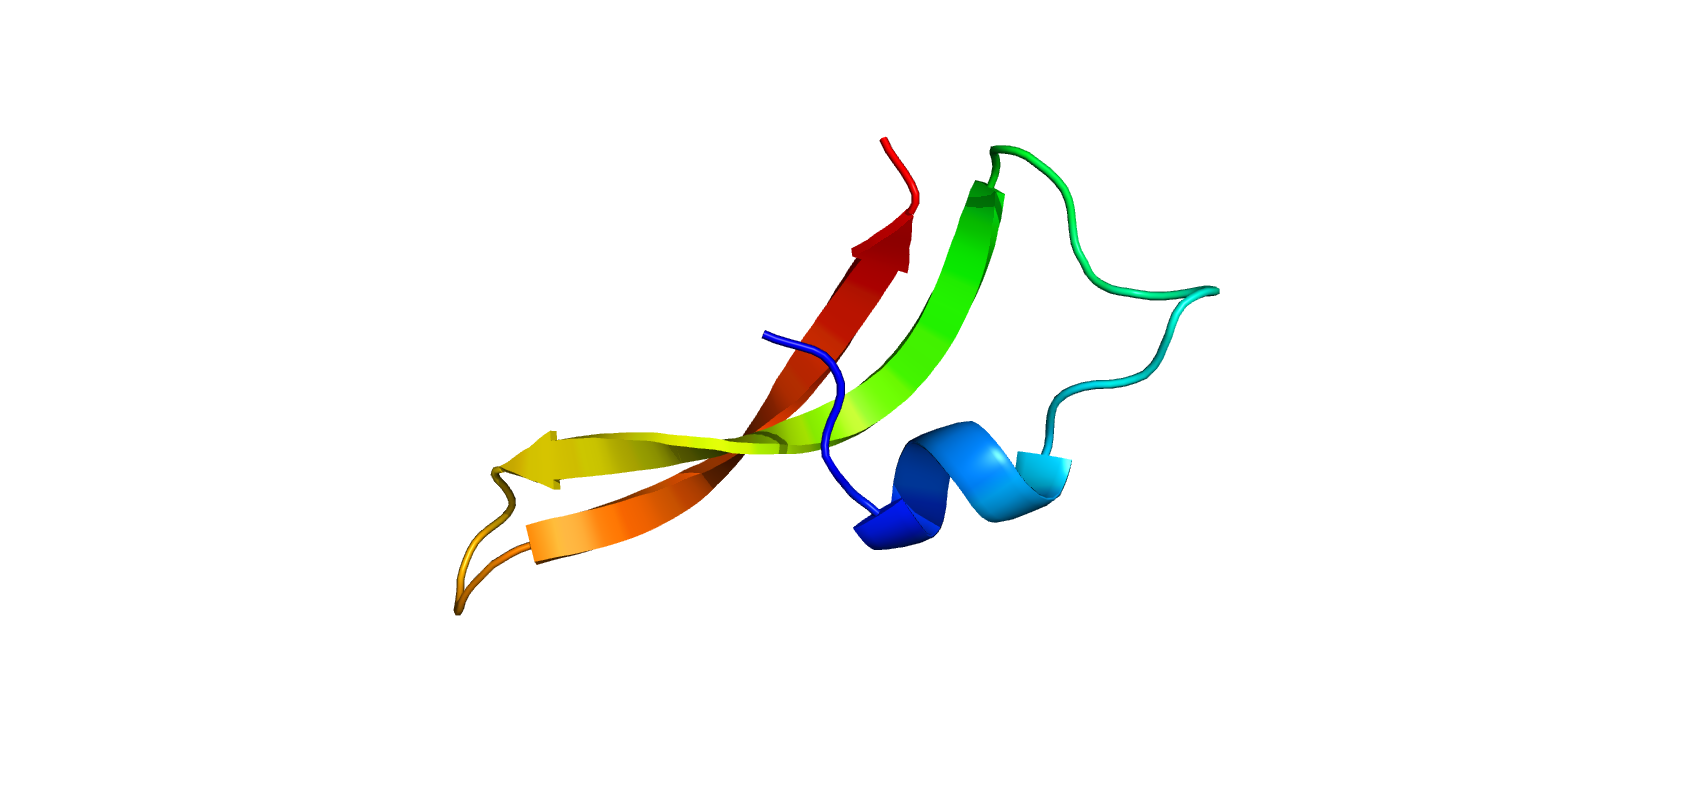

<h1><center>Special </center></h1>

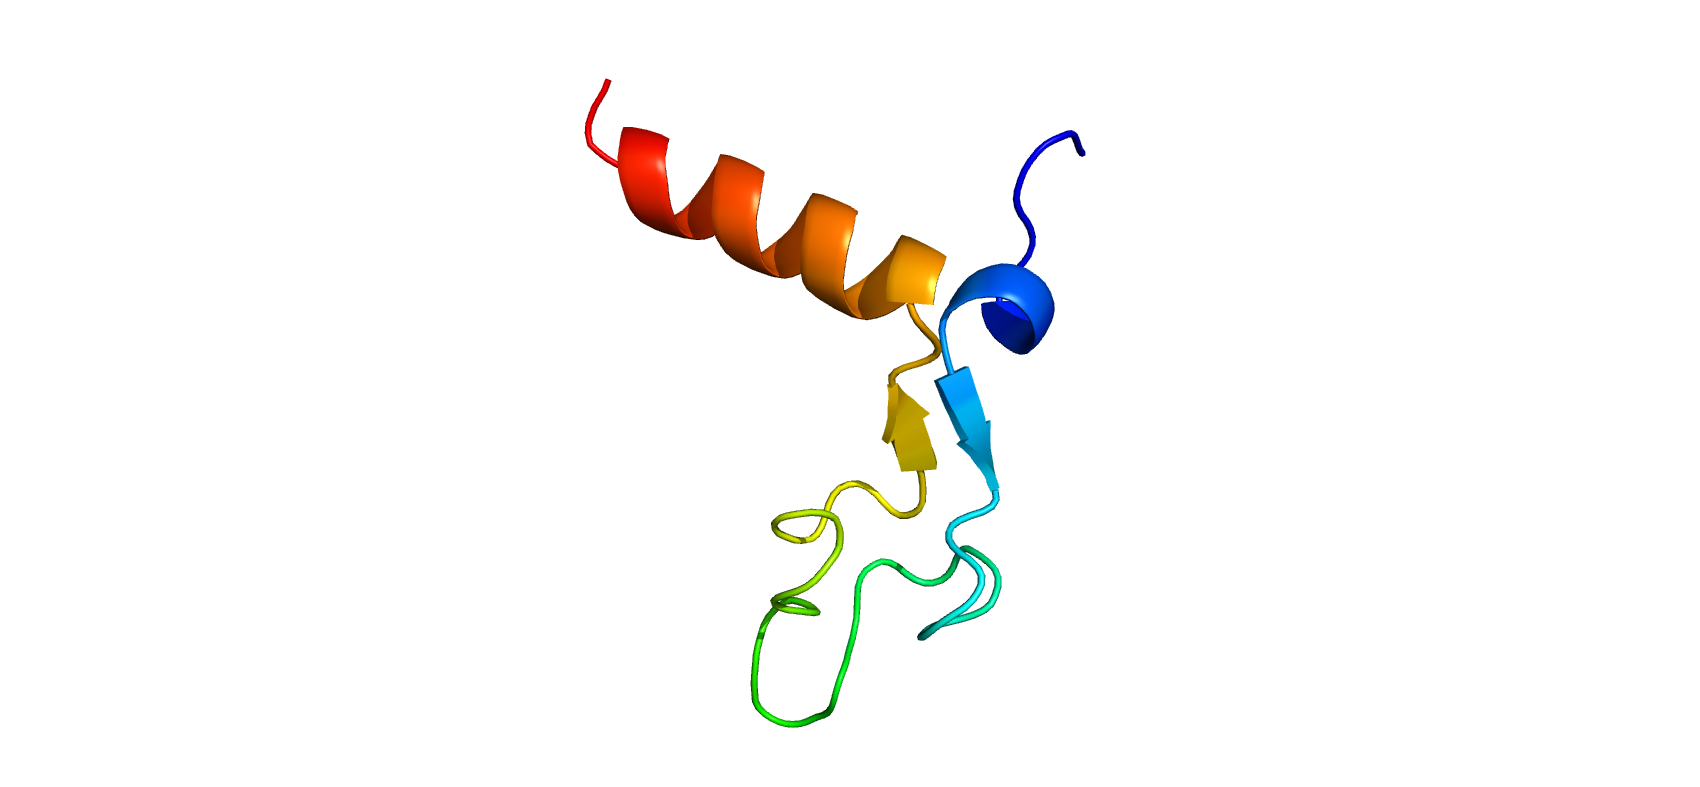

The project is divided in three sub-parts:

- Download the `.pdb` files of the proteins, separate it in the chains and compute the features.
- Clustering using `KNeighborsClassifier` and `DBSCAN`.
- Classification via neural networks.


## Download and cleaning of the `.pdb` files

In [ ]:
%run -i utils.py

In [23]:
# Using to define labels and to download the proteins

df = pd.read_csv("./CATH/cath-domain-list.txt",skiprows=16,names=["CATH_ID","Class_Number","Architecture_number","Topology_number","Homologous_superfamily_number",
                                                    "S35","S60","S95","S100_number","S100_count","Domain_length","resolution"],delim_whitespace=True)
df_new = df[df.resolution!=1000]
df_new["CATH_ID"] = df_new["CATH_ID"].map(lambda x: str(x)[:-3])
df_new = df_new.drop_duplicates("CATH_ID")
cath_id = np.array(df_new["CATH_ID"])
df_new = df_new.set_index(np.arange(0,len(cath_id)))

df_new=df_new.sort_values(by=['CATH_ID'],ignore_index=True)

In [ ]:
directory = "./prot_coord/"
dirout = "./coord_done/"
files = sorted(glb.glob(directory + '*'))
N_prot = len([name for name in os.listdir(directory)])
cath_file = open("./labels.txt","r")
cath_lines = cath_file.readlines()
cath_domain = []
for i in range(len(cath_domain)):
    cath_domain.append(cath_domain[i][:-1])

k=0
 
for i in files:
    if True:
        f = open("./coord_prot.txt","a")
        csvwriter = cs.writer(f) 
        prot_coord = np.genfromtxt(i,delimiter=' ')
        v = create_I2(prot_coord)
        xx = np.append(v,i[-8:-4])
        vector = np.append(xx, cath_domain[k])
        if os.path.exists('prot_coord/' + i[-8:-4]+ '.txt') == True:
            sht.move("prot_coord/"+i[-8:-4]+ ".txt",dirout)
        csvwriter.writerow(vector)
        f.close()
        k +=1

['./prot_coord/1pye.txt', './prot_coord/3qrh.txt', './prot_coord/4iwf.txt', './prot_coord/4yu4.txt', './prot_coord/5e2t.txt']


### Check if create_I2 is meaningful


In [6]:
# Straight line

n = 1000
t_max = 16 * np.pi
t = np.linspace(0, t_max, n)

line = np.zeros((n,3))
line[:,0]=t
line[:,1]=t
line[:,2]=t

v_1=create_I2(line)
v_1

array([1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.])

In [7]:
# Helix

num = [100,150, 200, 300, 500, 750, 1000, 1700, 2000, 3000, 5000, 7000, 10000]
v = []
for i in num:
    t = np.linspace(0, t_max, i)

    x = np.cos(t)
    y = np.sin(t)
    z = t

    helix = np.zeros((i,3))
    helix[:,0]=x[:]
    helix[:,1]=y[:]
    helix[:,2]=z[:]
    helix
    v1=create_I2(helix)
    v.append(v1[2])

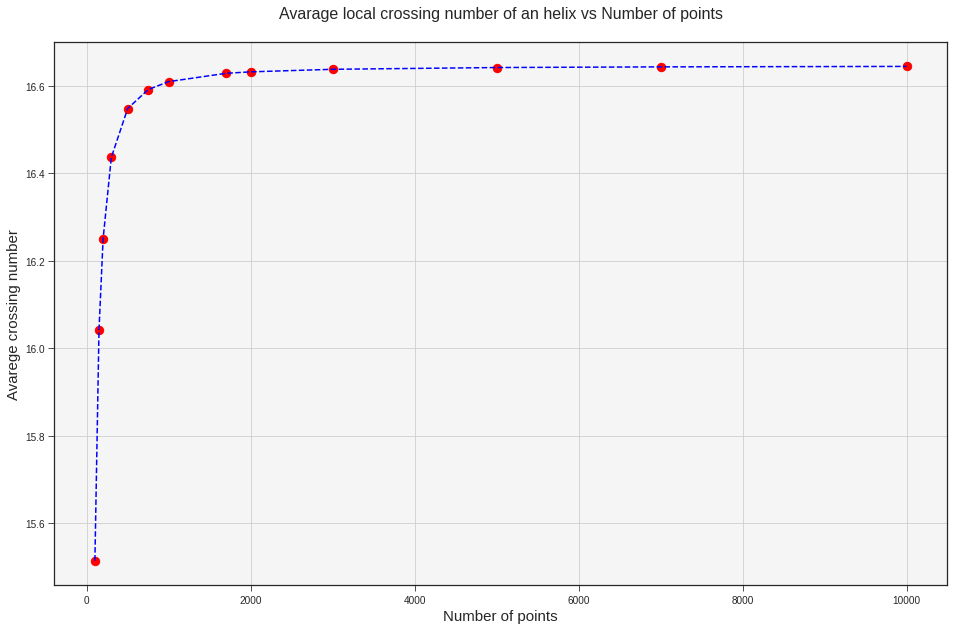

In [17]:
plt.figure(figsize=(16,10))

ax =plt.axes()
ax.set_facecolor("whitesmoke")
plt.plot(num, v,"--b")
plt.scatter(num, v, s = 70, c = "red")
plt.title("Avarage local crossing number of an helix vs Number of points\n", fontsize = 16)
plt.style.use('seaborn-ticks')
#
plt.xlabel("Number of points",fontsize=15)
plt.ylabel("Avarege crossing number",fontsize=15)
plt.grid()
plt.show()